Data definition https://www.cs.toronto.edu/~delve/data/adult/adultDetail.html

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('adult.csv')

df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


Missing values? No.

In [4]:
df.isna().any().sum()

0

Values that need to be replaced? Yes, there are question marks in some of the fields. so we need to drop those missing values.

In [5]:
df.replace('?', pd.NA, inplace = True)

# How does native country affect the income?

* French people in the U.S. have the highest percentage of higher incomes according to this data set

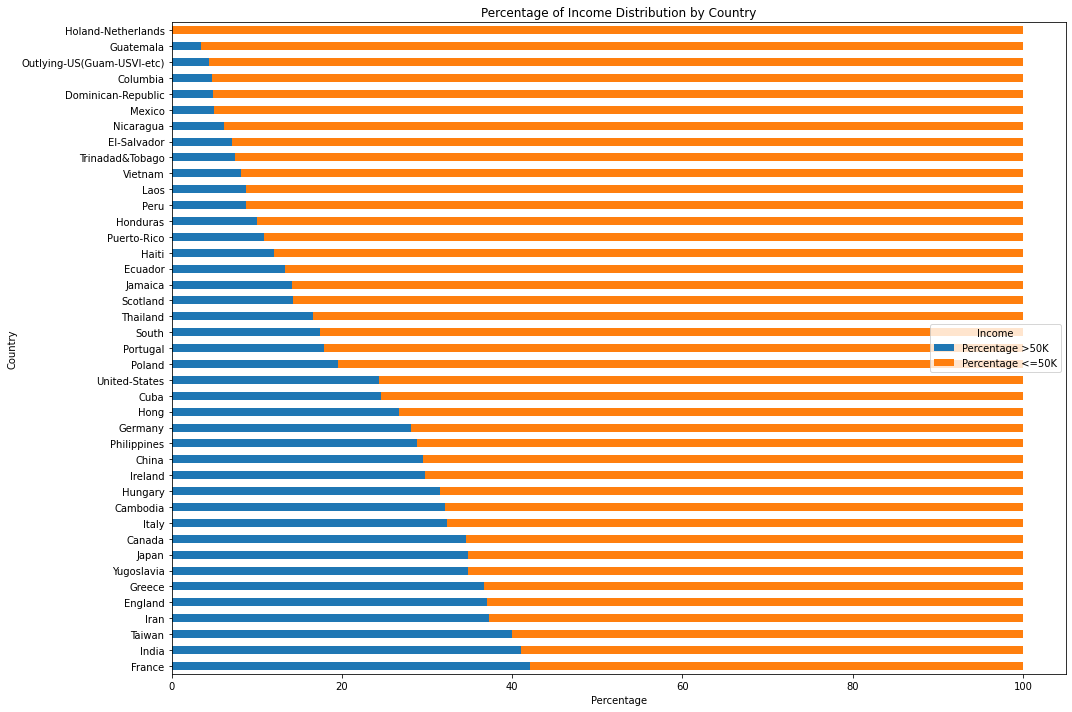

In [6]:
value_counts = df[['native-country','income']].groupby(['native-country', 'income']).size().unstack(fill_value=0)

# Calculate percentages
value_counts['Total'] = value_counts['<=50K'] + value_counts['>50K']
value_counts['Percentage >50K'] = (value_counts['>50K'] / value_counts['Total']) * 100
value_counts['Percentage <=50K'] = (value_counts['<=50K'] / value_counts['Total']) * 100

# Sort by Percentage >50K
value_counts.sort_values(by='Percentage >50K', ascending=False, inplace=True)

# Plot
fig, ax = plt.subplots(figsize=(15, 10))

value_counts[['Percentage >50K', 'Percentage <=50K']].plot(kind='barh', stacked=True, ax=ax)
ax.set_title('Percentage of Income Distribution by Country')
ax.set_xlabel('Percentage')
ax.set_ylabel('Country')
ax.legend(title='Income')
plt.tight_layout()
plt.show()

In [7]:
df.relationship.value_counts()

relationship
Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: count, dtype: int64

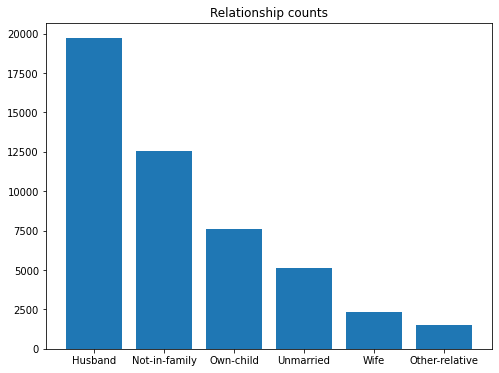

In [8]:
plt.figure(figsize=(8, 6))

plt.bar(df.relationship.value_counts().index, height = df.relationship.value_counts().values)
plt.title('Relationship counts')
plt.show()

In [9]:
df[['workclass','marital-status']].value_counts()

workclass         marital-status       
Private           Married-civ-spouse       14473
                  Never-married            12243
                  Divorced                  4702
Self-emp-not-inc  Married-civ-spouse        2554
Local-gov         Married-civ-spouse        1536
Self-emp-inc      Married-civ-spouse        1264
Private           Separated                 1119
                  Widowed                    892
State-gov         Married-civ-spouse         890
Local-gov         Never-married              798
Federal-gov       Married-civ-spouse         721
State-gov         Never-married              636
Self-emp-not-inc  Never-married              613
Local-gov         Divorced                   529
Private           Married-spouse-absent      453
Self-emp-not-inc  Divorced                   432
Federal-gov       Never-married              368
State-gov         Divorced                   316
Federal-gov       Divorced                   238
Self-emp-inc      Never-marri

# Marital status and income relationship

* People who never married have the largest low income percentage.
* Married spouces have more percentage of higher income

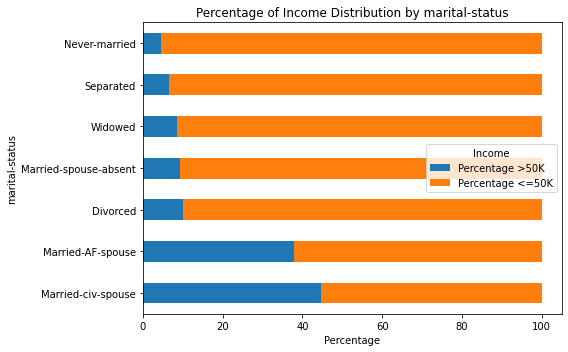

In [10]:
value_counts = df[['marital-status','income']].groupby(['marital-status', 'income']).size().unstack(fill_value=0)

# Calculate percentages
value_counts['Total'] = value_counts['<=50K'] + value_counts['>50K']
value_counts['Percentage >50K'] = (value_counts['>50K'] / value_counts['Total']) * 100
value_counts['Percentage <=50K'] = (value_counts['<=50K'] / value_counts['Total']) * 100

# Sort by Percentage >50K
value_counts.sort_values(by='Percentage >50K', ascending=False, inplace=True)

# Plot
fig, ax = plt.subplots(figsize=(8, 5))

value_counts[['Percentage >50K', 'Percentage <=50K']].plot(kind='barh', stacked=True, ax=ax)
ax.set_title('Percentage of Income Distribution by marital-status')
ax.set_xlabel('Percentage')
ax.set_ylabel('marital-status')
ax.legend(title='Income')
plt.tight_layout()
plt.show()

# Workclass and income

* Self employed people have the highest number of higher incomes followed by the federal government employees.


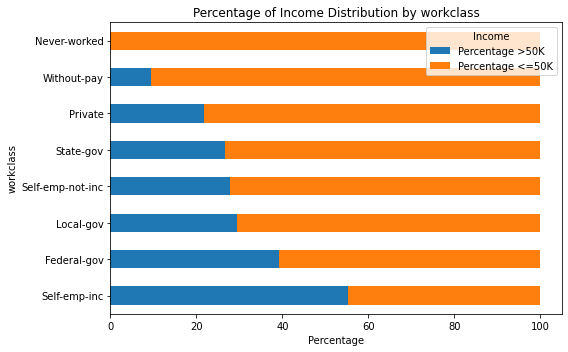

In [11]:
value_counts = df[['workclass','income']].groupby(['workclass', 'income']).size().unstack(fill_value=0)

# Calculate percentages
value_counts['Total'] = value_counts['<=50K'] + value_counts['>50K']
value_counts['Percentage >50K'] = (value_counts['>50K'] / value_counts['Total']) * 100
value_counts['Percentage <=50K'] = (value_counts['<=50K'] / value_counts['Total']) * 100

# Sort by Percentage >50K
value_counts.sort_values(by='Percentage >50K', ascending=False, inplace=True)

# Plot
fig, ax = plt.subplots(figsize=(8, 5))

value_counts[['Percentage >50K', 'Percentage <=50K']].plot(kind='barh', stacked=True, ax=ax)
ax.set_title('Percentage of Income Distribution by workclass')
ax.set_xlabel('Percentage')
ax.set_ylabel('workclass')
ax.legend(title='Income')
plt.tight_layout()
plt.show()

# Education and Income

* As people are more educated, the number of people with higher income increases

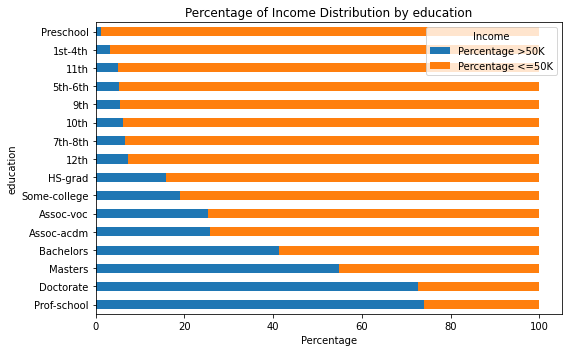

In [12]:
value_counts = df[['education','income']].groupby(['education', 'income']).size().unstack(fill_value=0)

# Calculate percentages
value_counts['Total'] = value_counts['<=50K'] + value_counts['>50K']
value_counts['Percentage >50K'] = (value_counts['>50K'] / value_counts['Total']) * 100
value_counts['Percentage <=50K'] = (value_counts['<=50K'] / value_counts['Total']) * 100

# Sort by Percentage >50K
value_counts.sort_values(by='Percentage >50K', ascending=False, inplace=True)

# Plot
fig, ax = plt.subplots(figsize=(8, 5))

value_counts[['Percentage >50K', 'Percentage <=50K']].plot(kind='barh', stacked=True, ax=ax)
ax.set_title('Percentage of Income Distribution by education')
ax.set_xlabel('Percentage')
ax.set_ylabel('education')
ax.legend(title='Income')
plt.tight_layout()
plt.show()

# Gender and Income relationship

* Men normally earn higher than women

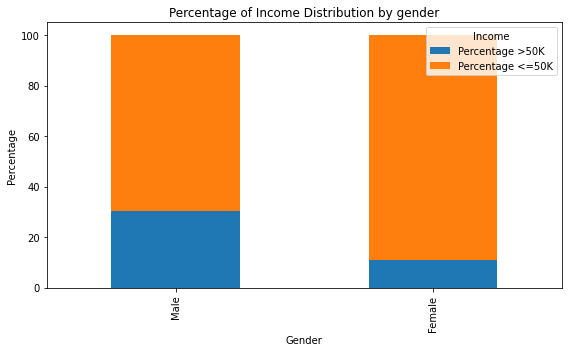

In [13]:
value_counts = df[['gender','income']].groupby(['gender', 'income']).size().unstack(fill_value=0)

# Calculate percentages
value_counts['Total'] = value_counts['<=50K'] + value_counts['>50K']
value_counts['Percentage >50K'] = (value_counts['>50K'] / value_counts['Total']) * 100
value_counts['Percentage <=50K'] = (value_counts['<=50K'] / value_counts['Total']) * 100

# Sort by Percentage >50K
value_counts.sort_values(by='Percentage >50K', ascending=False, inplace=True)

# Plot
fig, ax = plt.subplots(figsize=(8, 5))

value_counts[['Percentage >50K', 'Percentage <=50K']].plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Percentage of Income Distribution by gender')
ax.set_xlabel('Gender')
ax.set_ylabel('Percentage')
ax.legend(title='Income')
plt.tight_layout()
plt.show()

In [14]:
df.dropna(inplace=True)

In [15]:
df.isna().any().sum()

0

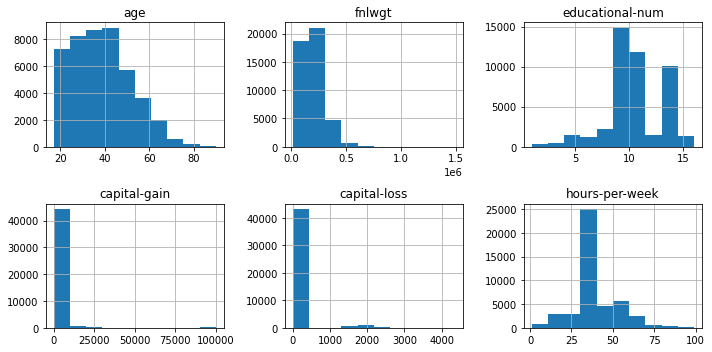

In [16]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (10,5))

axes = axes.flatten()

numerical_columns = df.select_dtypes(include=['int', 'float']).columns

for i, col in enumerate(numerical_columns):
    df[col].hist(ax=axes[i])
    axes[i].set_title(col)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

In [17]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

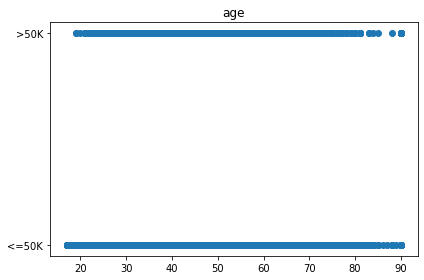

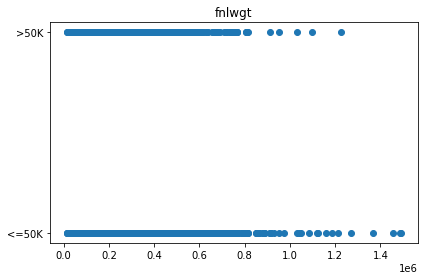

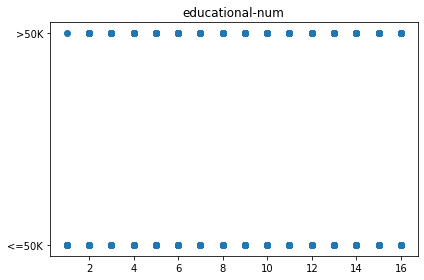

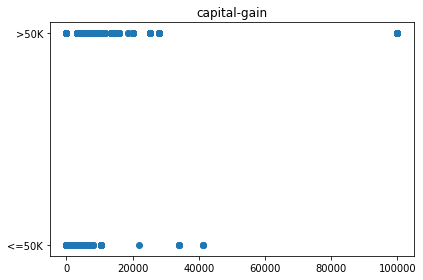

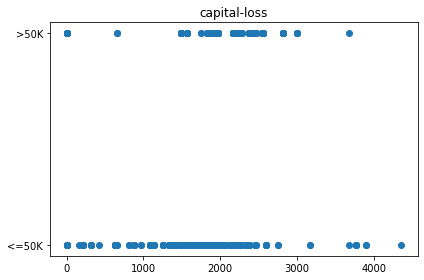

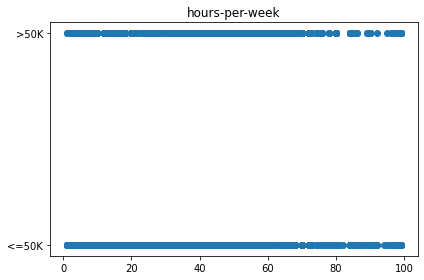

In [18]:
for i, col in enumerate(numerical_columns):
    plt.scatter(x = df[col], y = df.income)
    axes[i].set_title(col)
    plt.title(col)

# Adjust layout to prevent overlapping
    plt.tight_layout()

# Show the plot
    plt.show()

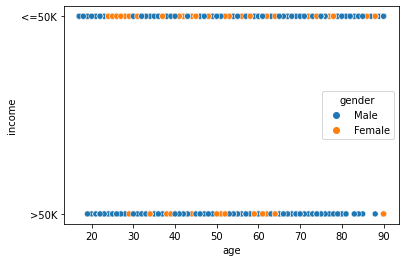

In [19]:
sns.scatterplot(x = 'age', y='income', data = df, hue = 'gender')
plt.show()

There is a lot more older women working with low income

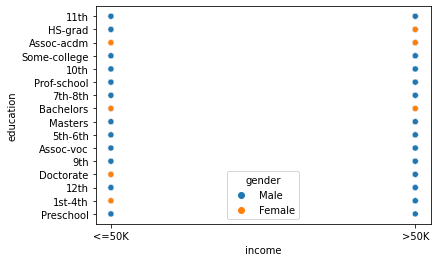

In [20]:
sns.scatterplot(x = 'income', y='education', data = df, hue = 'gender')
plt.show()

In [21]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [22]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,4.522200e+04,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,1.897347e+05,10.118460,1101.430344,88.595418,40.938017
std,13.217870,1.056392e+05,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173882e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783160e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.379260e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [23]:
# Separate numerical and categorical features
numerical_features = ['age','fnlwgt','educational-num','capital-gain','capital-loss','hours-per-week']
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 
                        'race', 'gender', 'native-country', 'income']

In [24]:
# Preprocess numerical features (e.g., handle missing values, scale features)
# For example, you can use StandardScaler from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,-1.024983,Private,0.350889,11th,-1.221559,Never-married,Machine-op-inspct,Own-child,Black,Male,-0.146733,-0.21878,-0.078120,United-States,<=50K
1,-0.041455,Private,-0.945878,HS-grad,-0.438122,Married-civ-spouse,Farming-fishing,Husband,White,Male,-0.146733,-0.21878,0.754701,United-States,<=50K
2,-0.798015,Local-gov,1.393592,Assoc-acdm,0.737034,Married-civ-spouse,Protective-serv,Husband,White,Male,-0.146733,-0.21878,-0.078120,United-States,>50K
3,0.412481,Private,-0.278420,Some-college,-0.046403,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,0.877467,-0.21878,-0.078120,United-States,>50K
5,-0.344079,Private,0.084802,10th,-1.613277,Never-married,Other-service,Not-in-family,White,Male,-0.146733,-0.21878,-0.910942,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,-0.873671,Private,0.639611,Assoc-acdm,0.737034,Married-civ-spouse,Tech-support,Wife,White,Female,-0.146733,-0.21878,-0.244684,United-States,<=50K
48838,0.109857,Private,-0.334735,HS-grad,-0.438122,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,-0.146733,-0.21878,-0.078120,United-States,>50K
48839,1.471665,Private,-0.358060,HS-grad,-0.438122,Widowed,Adm-clerical,Unmarried,White,Female,-0.146733,-0.21878,-0.078120,United-States,<=50K
48840,-1.251951,Private,0.111279,HS-grad,-0.438122,Never-married,Adm-clerical,Own-child,White,Male,-0.146733,-0.21878,-1.743763,United-States,<=50K


In [25]:
# Preprocess categorical features (e.g., one-hot encoding)
df = pd.get_dummies(df, columns=categorical_features,drop_first=True)

In [26]:
df

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,-1.024983,0.350889,-1.221559,-0.146733,-0.21878,-0.078120,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
1,-0.041455,-0.945878,-0.438122,-0.146733,-0.21878,0.754701,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
2,-0.798015,1.393592,0.737034,-0.146733,-0.21878,-0.078120,True,False,False,False,...,False,False,False,False,False,False,True,False,False,True
3,0.412481,-0.278420,-0.046403,0.877467,-0.21878,-0.078120,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
5,-0.344079,0.084802,-1.613277,-0.146733,-0.21878,-0.910942,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,-0.873671,0.639611,0.737034,-0.146733,-0.21878,-0.244684,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
48838,0.109857,-0.334735,-0.438122,-0.146733,-0.21878,-0.078120,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
48839,1.471665,-0.358060,-0.438122,-0.146733,-0.21878,-0.078120,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
48840,-1.251951,0.111279,-0.438122,-0.146733,-0.21878,-1.743763,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False


In [27]:
df.replace({True:1, False:0}, inplace=True)

df.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,-1.024983,0.350889,-1.221559,-0.146733,-0.21878,-0.078120,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,-0.041455,-0.945878,-0.438122,-0.146733,-0.21878,0.754701,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,-0.798015,1.393592,0.737034,-0.146733,-0.21878,-0.078120,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0.412481,-0.278420,-0.046403,0.877467,-0.21878,-0.078120,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
5,-0.344079,0.084802,-1.613277,-0.146733,-0.21878,-0.910942,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


Correlations

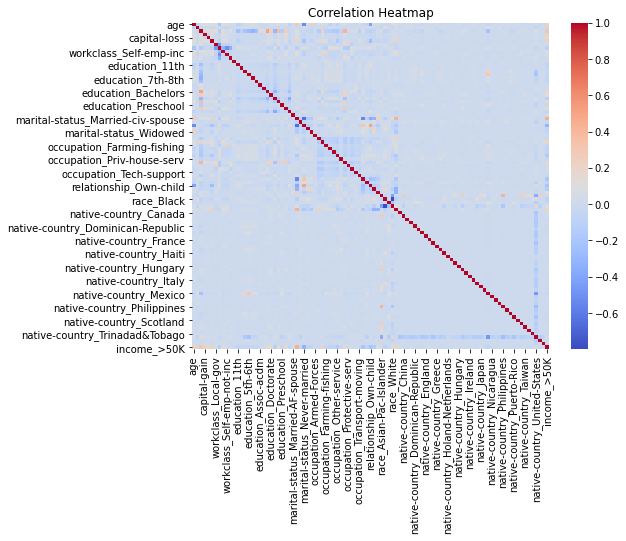

In [28]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()